In [57]:
import pickle
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)
import numpy as np
import mat73

In [2]:
# mat_data  = mat73.loadmat('/Users/sonmjack/Downloads/simon_paper/data_fam1novfam1_timeseries.mat')


In [5]:

with open('/Users/sonmjack/Downloads/simon_paper/mask_fam1.pkl', 'rb') as file:
    mask = pickle.load(file)
with open('/Users/sonmjack/Downloads/simon_paper/dynamic_list_fam_age2_version2.pkl', 'rb') as file:
    dy_list = pickle.load(file)
with open('/Users/sonmjack/Downloads/simon_paper/fam1_neuron_list_age2.pkl', 'rb') as file:
    neuron_spike = pickle.load(file)

mat_trigger =  np.load('/Users/sonmjack/Downloads/simon_paper/shengyuan_trigger_fam1.npy')
# Spike_train=np.load('/rds/general/user/msaeedia/home/data/slab/%s%s.npy' % (char2,data[l]), allow_pickle=True)


In [46]:
# kNN
# 这个没问题
i = 3
mask_index = mask[:, :, int(mat_trigger[10+i*2,0]):int(mat_trigger[11+i*2,0])]
Spike_train= neuron_spike[i]
A = dy_list[i]
N = A.shape[0]
# In directed network, the links are removed if both sides have weights below their thresholds. 
# Otherwise there is no garanteee to have a connected network.

import networkx as nx
from scipy import sparse

def Connector(Q):
    D = nx.to_networkx_graph(Q,create_using=nx.DiGraph())
    Isolate_list=list(nx.isolates(D))
    if len(Isolate_list)>0:
        for i in Isolate_list:
            if i==0:
                Q[i+1,i]=0.0001
            else:
                Q[i-1,i]=0.0001
    del D
    return Q


np.fill_diagonal(A,0)
# print(max(A[:,4]))
# A=np.where(A > 0.09, 1, 0)
k=10

# W.sort(reverse=True)
B1 = np.zeros((N, N))
for i in range(N):
    W=sorted(A[i,:],reverse=True)
#     print( W[k])
    B1[i,:]=np.where(A[i,:] > W[k], 1, 0)

# B=np.multiply(B1,A)
# print(W[k])
# print(A[20,1:20])
# print(B[20,1:20])

    
C1 = np.zeros((N, N))
for i in range(N):
    W=sorted(A[:,i],reverse=True)
#     print( W[k])
    C1[:,i]=np.where(A[:,i] > W[k], 1, 0)
# C=np.multiply(C1,A)
Q1=B1+C1    
Q2=np.where(Q1 > .9 , 1, 0) 

Q=np.multiply(Q2,A)
# del A
del B1
del C1
del Q1
del Q2 

for i in range(Q.shape[0]):
    # 检查该行是否全为零
    if np.all(Q[i] == 0):
        # 如果是全为零，随机选择一个元素，并将其赋值为 0.001
        random_index = np.random.randint(0, Q.shape[1])  # 随机选择一个列索引
        Q[i, random_index] = 0.001
Connector(Q)
D = nx.to_networkx_graph(Q,create_using=nx.DiGraph())
D.number_of_edges()

# adjacency = nx.to_scipy_sparse_array(A)

2169

In [47]:
import networkx as nx
import scipy.sparse as sp
import pygenstability as pgs
import scipy.sparse as sp
adjacency = sp.csr_matrix(Q)
test = sp.csgraph.connected_components(adjacency)

In [49]:
all_results = pgs.run(adjacency,
                  min_scale=-1.5,
                  max_scale=1.5,
                  n_scale= 200,
                  n_tries = 600,
                  constructor="directed")

Your graph is directed!
100%|██████████| 200/200 [00:10<00:00, 18.94it/s]


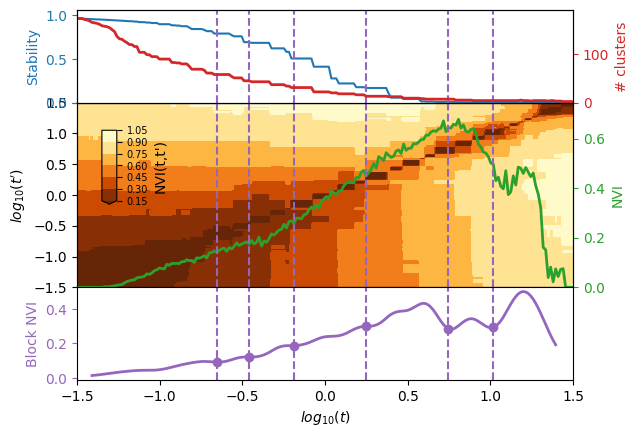

In [67]:
all_results = pgs.identify_optimal_scales(all_results,kernel_size=14,window_size=14)
_ = pgs.plot_scan(all_results)
plt.show()

In [80]:
t_opt=2
selected_partitions=all_results['selected_partitions']
Community=all_results['community_id'][selected_partitions[-t_opt]]

In [81]:
import numpy as np
import matplotlib.colors as mcolors
import random


Color_Code2=["red","orange","pink","olive","cyan","black","yellow","green","brown","gray","tomato","violet","yellowgreen","y","crimson","darkgoldenrod","darkmagenta","indigo","darkred","darkkhaki","orangered",'aqua','aquamarine','azure','beige','bisque','black','blanchedalmond','blue','blueviolet','brown','burlywood','cadetblue','chartreuse','chocolate','coral','cornflowerblue','cornsilk','crimson','cyan','darkblue','darkcyan','darkgoldenrod','darkgray','darkkhaki','darkolivegreen','darkorange','darkorchid','darkred','darkseagreen','darkslateblue','darkslategray','darkturquoise','darkviolet','deeppink','deepskyblue','dimgray','dodgerblue','firebrick','floralwhite','forestgreen','fuchsia','gainsboro','ghostwhite','goldenrod','greenyellow','honeydew','hotpink','indianred','indigo','ivory','khaki','lavender','lavenderblush','lawngreen','lemonchiffon','lightblue','lightcoral','lightcyan','lightgoldenrodyellow','lightgreen','lightgray','lightpink','lightsalmon','lightseagreen','lightskyblue','lightslategray','lightsteelblue','lightyellow']

list_color=[]
for color in mcolors.CSS4_COLORS:
    list_color.append(color)
random.shuffle(list_color)
Color_Code1=[*Color_Code2, *list_color]
Color_Code=[*Color_Code1, *list_color]
non_zero_indices_per_row = []
for row in Spike_train:
     # 找到每行中不为0的元素的列索引
     non_zero_indices = np.where(row != 0)[0]
     # 添加到列表中
     non_zero_indices_per_row.append(list(non_zero_indices))

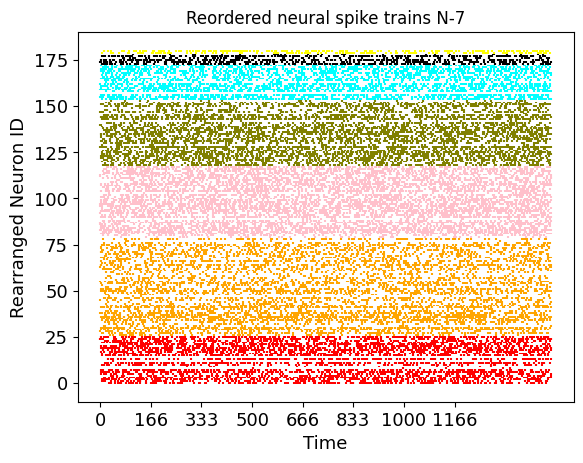

In [82]:
neuralData = []
ColorCode = []

it=0
Nodes = range(len(non_zero_indices_per_row))
for i in range(max(Community)+1):
    for m,j in zip(Nodes,range(N)):
        if Community[j]==i:
            non_zero_indices_per_row[int(m)].sort()
            neuralData.append(non_zero_indices_per_row[int(m)])
            ColorCode.append(Color_Code[i])
            # A_ordered_row[it,:]=Q[j,:]
            it+=1
# it=0
# for i in range(max(Community)+1):
#     for m,j in zip(Nodes,range(N)):
#         if Community[j]==i:
#             A_ordered[:,it]=A_ordered_row[:,j]
#             it+=1
plt.eventplot(neuralData, color=ColorCode)   
# plot.xlim([8000,9000])
# plot.title('Spike raster plot')
# plt.title(r"%s,  $N_g=%d$" % (data[l],max(Community)+1), fontweight ='bold',)
# plt.title(r"%s,  $S_%d$,  $N_c=%d$" % (data[l],t_opt,max(Community)+1),fontsize = 22)
plt.title("Reordered neural spike trains "+f'N-{max(Community)+1}')
plt.xlabel('Time',fontsize = 13)
plt.ylabel('Rearranged Neuron ID',fontsize = 13)
plt.yticks(fontsize=13)
plt.xticks(np.arange(0,40000, 5000), [str(int(i*5000/30)) for i in range(0, 8)],fontsize=13)
plt.show()

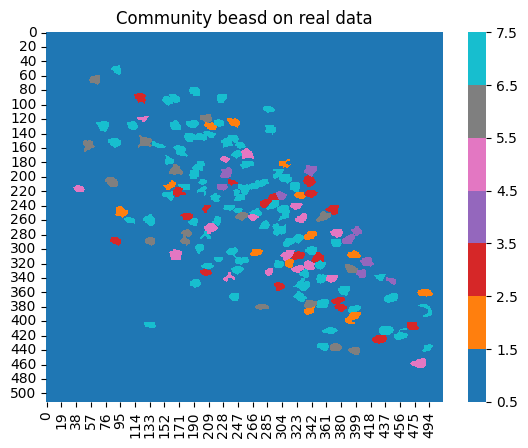

In [77]:
from matplotlib.colors import BoundaryNorm
pic = np.zeros((512,512))
for i in range(mask_index.shape[2]):
    index_row = np.where(mask_index[:,:,i]==True)[0]
    index_con = np.where(mask_index[:,:,i]==True)[1]
    for j in range(len(index_row)):
        if Community[i] ==0:
            pic[index_row[j],index_con[j]] = np.max(Community)+1
        else:
            pic[index_row[j],index_con[j]] = Community[i]
#cmap = sns.diverging_palette(220, 20, as_cmap=True)
import seaborn as sns
cmap = plt.get_cmap('tab10')  # 选择具有10种颜色的颜色映射
bounds = np.linspace(0.5, 7.5, 8)  # 定义边界以确保每个整数分配到不同的颜色
norm = BoundaryNorm(bounds, cmap.N)

sns.heatmap(pic,  cmap=cmap, norm=norm)
plt.title('Community beasd on real data')
plt.show()

In [72]:
#类别内同步的发放分布和平均
neural_re = []
index= []
it=0
Nodes = range(len(non_zero_indices_per_row))
index.append(it)
for i in range(max(Community)+1):
    for m,j in zip(Nodes,range(N)):
        if Community[j]==i:
            neural_re.append(Spike_train[int(m),:])
            # A_ordered_row[it,:]=Q[j,:]
            it+=1
    index.append(it)
neural_re = np.array(neural_re)


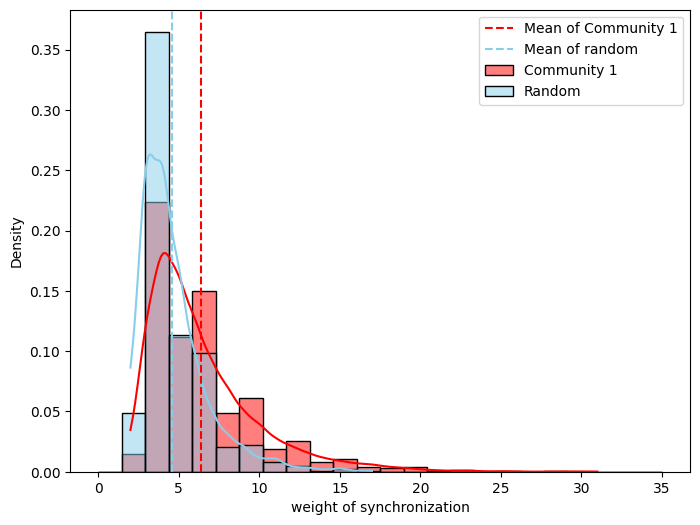

In [15]:
neurolgroup = []
for i in range(len(index)):
    if i ==len(index)-1:
        break
    neurolgroup.append(np.sum(neural_re[index[i]:index[i+1],:], axis=0))
neurolgroup = np.array(neurolgroup)

rows1 = np.random.choice(range(index[0], index[1]), size=3, replace=False)  # 从第0-84行中随机选取3行
rows2 = np.random.choice(range(index[1], index[2]), size=3, replace=False)  # 从第84-181行中随机选取3行
rows3 = np.random.choice(range(index[2], index[3]), size=3, replace=False)  # 从第181-232行中随机选取3行

# 将选取的行合并成一个列表
selected_rows = np.concatenate([rows1, rows2, rows3])

selected_data = neural_re[selected_rows]

bins = np.linspace(0, 35, num=25)
non_zero_values1 = neurolgroup[0,:][neurolgroup[0,:] != 0]
non_zero_values2 = neurolgroup[1,:][neurolgroup[1,:] != 0]
non_zero_values3 = neurolgroup[2,:][neurolgroup[2,:] != 0]
selected_data = selected_data[selected_data !=0]

plt.figure(figsize=(8, 6))
sns.histplot(non_zero_values1, color='red', kde=True, label='Community 1', alpha= 0.5, bins=bins,stat='density')
# sns.histplot(non_zero_values2, color='green', kde=True, label='Community 2', alpha= 0.5,bins=20)
# sns.histplot(non_zero_values3, color='blue', kde=True, label='Community 3', alpha= 0.5,bins=20)
sns.histplot(selected_data, color='skyblue', kde=True, label='Random', alpha= 0.5, bins=bins,stat='density')

plt.axvline(np.mean(non_zero_values1), color='red', linestyle='--', label='Mean of Community 1')
# plt.axvline(np.mean(non_zero_values2), color='green', linestyle='--', label='Mean of Community 2')
# plt.axvline(np.mean(non_zero_values3), color='blue', linestyle='--', label='Mean of Community 3')
plt.axvline(np.mean(selected_data), color='skyblue', linestyle='--', label='Mean of random')



# 添加图例
plt.legend()
plt.xlabel("weight of synchronization")
# 显示图形
plt.show()

In [23]:
with open('/Users/sonmjack/Downloads/simon_paper/dynamic_list_fam_age2_shuffled.pkl', 'rb') as file:
    dy_list_shuffled = pickle.load(file)
i = 3
A_shuffled = dy_list_shuffled[i]
N = A_shuffled.shape[0]
np.fill_diagonal(A,0)
# print(max(A[:,4]))
# A=np.where(A > 0.09, 1, 0)
k=10

# W.sort(reverse=True)
B1 = np.zeros((N, N))
for i in range(N):
    W=sorted(A_shuffled[i,:],reverse=True)
#     print( W[k])
    B1[i,:]=np.where(A_shuffled[i,:] > W[k], 1, 0)

# B=np.multiply(B1,A)
# print(W[k])
# print(A[20,1:20])
# print(B[20,1:20])

    
C1 = np.zeros((N, N))
for i in range(N):
    W=sorted(A_shuffled[:,i],reverse=True)
#     print( W[k])
    C1[:,i]=np.where(A_shuffled[:,i] > W[k], 1, 0)
# C=np.multiply(C1,A)
Q1=B1+C1    
Q2=np.where(Q1 > .9 , 1, 0) 

Q_shuffled=np.multiply(Q2,A_shuffled)

for i in range(Q_shuffled.shape[0]):
    # 检查该行是否全为零
    if np.all(Q_shuffled[i] == 0):
        # 如果是全为零，随机选择一个元素，并将其赋值为 0.001
        random_index = np.random.randint(0, Q_shuffled.shape[1])  # 随机选择一个列索引
        Q_shuffled[i, random_index] = 0.001

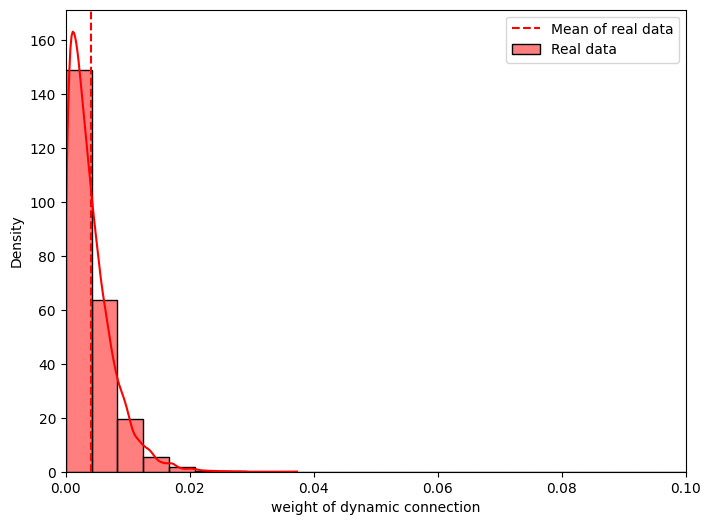

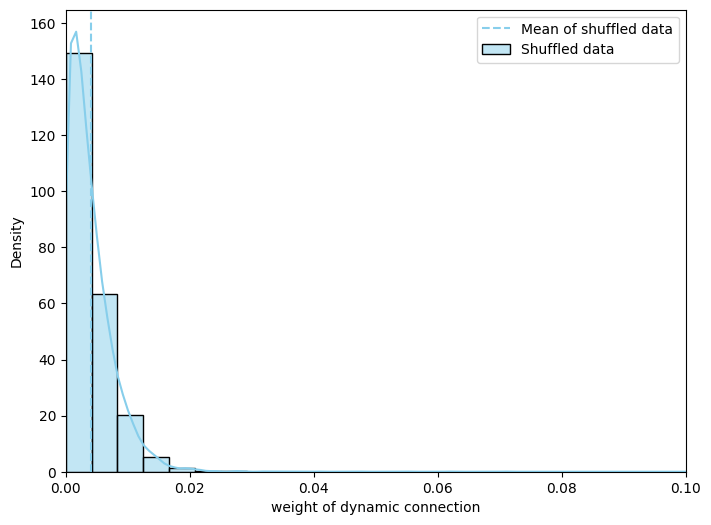

In [17]:

def pre_process(data):
    dy_r = data
    t_p = np.ravel(dy_r.copy())
    t_p = t_p[t_p != 0]
    #t_p = t_p[t_p <= 0.10]
    return t_p

real = pre_process(A)
shuffled = pre_process(A_shuffled)
bins = np.linspace(0, 0.1, num=25)
plt.figure(figsize=(8, 6))
sns.histplot(real, color='red', kde=True, label='Real data', alpha= 0.5, bins=bins,stat='density')
plt.axvline(np.mean(real), color='red', linestyle='--', label='Mean of real data')
plt.legend()
plt.xlabel("weight of dynamic connection")
plt.xlim(0, 0.1)
plt.figure(figsize=(8, 6))
sns.histplot(shuffled, color='skyblue', kde=True, label='Shuffled data', alpha= 0.5, bins=bins,stat='density')
plt.axvline(np.mean(shuffled), color='skyblue', linestyle='--', label='Mean of shuffled data')
# 添加图例
plt.legend()
plt.xlim(0, 0.1)
plt.xlabel("weight of dynamic connection")
# 显示图形
plt.show()

In [18]:
A = Q
N = np.size(A,0)
Detail_Balance_A = []
Compone_strength_A = []


for i in range(N):
    for j in range(N):
        if (A[i, j] > 0):
            Compone_strength_A.append(A[i, j])
        if (i > j and (A[i, j] + A[j, i]) > 0):
            #             print(i,j,Be[i,j])
            Detail_Balance_A.append(abs(A[i, j] - A[j, i]) / (A[i, j] + A[j, i]))

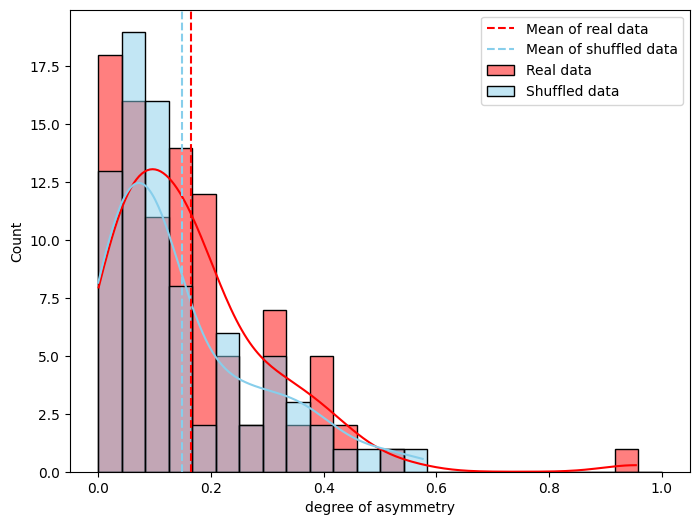

In [19]:
A_shuffled = Q_shuffled
N = np.size(A,0)
Detail_Balance_A_shuffled = []
Compone_strength_A_shuffled = []


for i in range(N):
    for j in range(N):
        if (A_shuffled[i, j] > 0):
            Compone_strength_A_shuffled.append(A_shuffled[i, j])
        if (i > j and (A_shuffled[i, j] + A_shuffled[j, i]) > 0):
            #             print(i,j,Be[i,j])
            Detail_Balance_A_shuffled.append(abs(A_shuffled[i, j] - A_shuffled[j, i]) / (A_shuffled[i, j] + A_shuffled[j, i]))
       

def pre_process2(data):
    dy_r = np.array(data)
    t_p = np.ravel(dy_r.copy())
    t_p = t_p[t_p != 1]
    return t_p

Detail_Balance_A = pre_process2(Detail_Balance_A)
Detail_Balance_A_shuffled = pre_process2(Detail_Balance_A_shuffled)

bins = np.linspace(0, 1, num=25)
plt.figure(figsize=(8, 6))
sns.histplot(Detail_Balance_A, color='red', kde=True, label='Real data', alpha= 0.5, bins=bins)
sns.histplot(Detail_Balance_A_shuffled, color='skyblue', kde=True, label='Shuffled data', alpha= 0.5, bins=bins)

plt.axvline(np.mean(Detail_Balance_A), color='red', linestyle='--', label='Mean of real data')
plt.axvline(np.mean(Detail_Balance_A_shuffled), color='skyblue', linestyle='--', label='Mean of shuffled data')
# 添加图例
plt.legend()
plt.xlabel("degree of asymmetry")
# 显示图形
plt.show()
    

In [20]:
import scipy.io
be_data = scipy.io.loadmat('/Users/sonmjack/Downloads/simon_paper/data_fam1novfam1_trackdata.mat')
be_phi_sum = be_data['fam1_phi'][8,0]


In [125]:
group1 = neuralData[index[0]:index[1]] 
be_g1 = []
for i in range(len(group1)):
    for j in group1[i]:
        be_g1.append(be_phi_sum[j])
        
group2 = neuralData[index[1]:index[2]] 
be_g2 = []
for i in range(len(group2)):
    for j in group2[i]:
        be_g2.append(be_phi_sum[j])
        
group3 = neuralData[index[2]:index[3]] 
be_g3 = []
for i in range(len(group3)):
    for j in group3[i]:
        be_g3.append(be_phi_sum[j])

group4 = neuralData[index[3]:index[4]] 
be_g4 = []
for i in range(len(group4)):
    for j in group4[i]:
        be_g4.append(be_phi_sum[j])
        

/var/folders/jz/rt8774f93qn00g88dj6zpmn40000gn/T/ipykernel_42686/198488863.py:26: UserWarning: Matplotlib is currently using nbAgg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


<IPython.core.display.Javascript object>


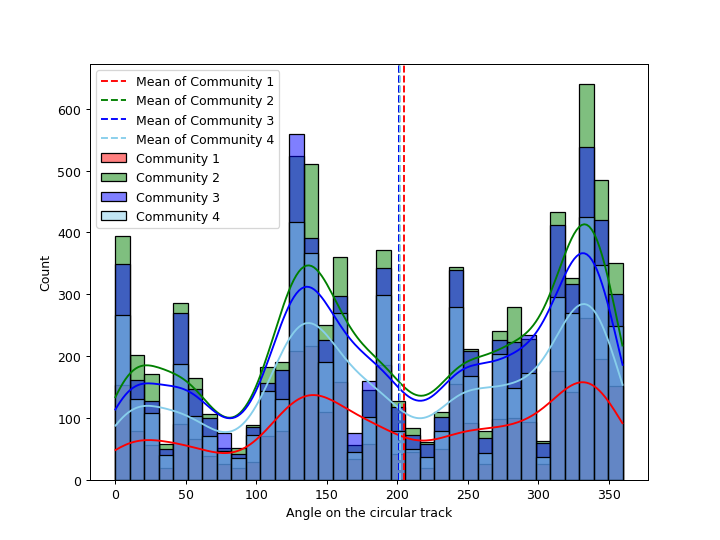

In [129]:
def pre_process3(data):
    dy_r = np.array(data)
    t_p = np.ravel(dy_r.copy())
    return t_p
be_g1 = pre_process3(be_g1)
be_g2 = pre_process3(be_g2)
be_g3 = pre_process3(be_g3)
be_g4 = pre_process3(be_g4)

plt.figure(figsize=(8, 6))
bins = np.linspace(0, 360, num=36)
sns.histplot(be_g1, color='red', kde=True, label='Community 1', alpha= 0.5, bins=bins)
sns.histplot(be_g2, color='green', kde=True, label='Community 2', alpha= 0.5,bins=bins)
sns.histplot(be_g3, color='blue', kde=True, label='Community 3', alpha= 0.5,bins=bins)
sns.histplot(be_g4, color='skyblue', kde=True, label='Community 4', alpha= 0.5, bins=bins)

plt.axvline(np.mean(be_g1), color='red', linestyle='--', label='Mean of Community 1')
plt.axvline(np.mean(be_g2), color='green', linestyle='--', label='Mean of Community 2')
plt.axvline(np.mean(be_g3), color='blue', linestyle='--', label='Mean of Community 3')
plt.axvline(np.mean(be_g4), color='skyblue', linestyle='--', label='Mean of Community 4')

# 添加图例
plt.legend()
plt.xlabel("Angle on the circular track")
# 显示图形
plt.show()

In [51]:
adjacency = sp.csr_matrix(Q_shuffled)

all_results_shuffled = pgs.run(adjacency,
                      min_scale=-1.5,
                      max_scale=1.5,
                      n_scale=200,
                      n_tries=600,
                      constructor="directed")

Your graph is directed!
100%|██████████| 200/200 [00:16<00:00, 11.87it/s]


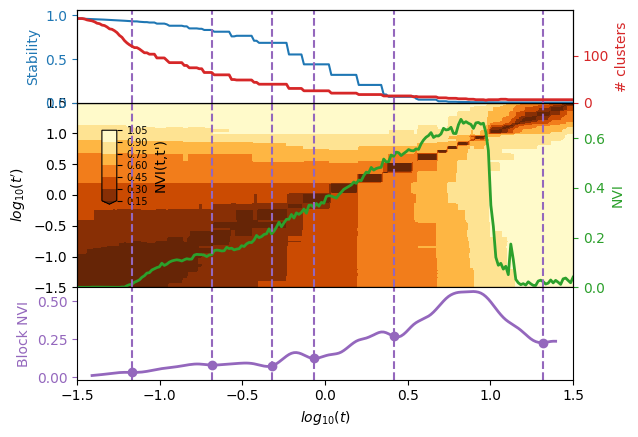

In [66]:
all_results_shuffled = pgs.identify_optimal_scales(all_results_shuffled,kernel_size=14,window_size=14)
_ = pgs.plot_scan(all_results_shuffled)
plt.show()

In [73]:
    
t_opt=2
selected_partitions=all_results_shuffled['selected_partitions']
Community=all_results_shuffled['community_id'][selected_partitions[-t_opt]]

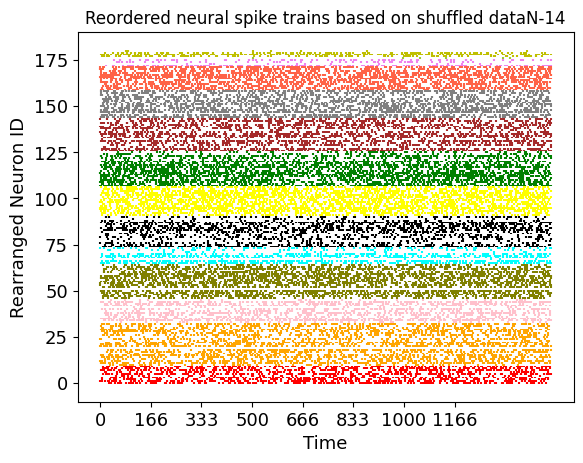

In [78]:
neuralData = []
ColorCode = []
non_zero_indices_per_row = []
for row in Spike_train:
     # 找到每行中不为0的元素的列索引
     np.random.shuffle(row)
     non_zero_indices = np.where(row != 0)[0]
     # 添加到列表中
     non_zero_indices_per_row.append(list(non_zero_indices))
     
it=0
Nodes = range(len(non_zero_indices_per_row))
for i in range(max(Community)+1):
    for m,j in zip(Nodes,range(N)):
        if Community[j]==i:
            non_zero_indices_per_row[int(m)].sort()
            neuralData.append(non_zero_indices_per_row[int(m)])
            ColorCode.append(Color_Code[i])
            # A_ordered_row[it,:]=Q[j,:]
            it+=1
# it=0
# for i in range(max(Community)+1):
#     for m,j in zip(Nodes,range(N)):
#         if Community[j]==i:
#             A_ordered[:,it]=A_ordered_row[:,j]
#             it+=1
plt.eventplot(neuralData, color=ColorCode)   
# plot.xlim([8000,9000])
# plot.title('Spike raster plot')
# plt.title(r"%s,  $N_g=%d$" % (data[l],max(Community)+1), fontweight ='bold',)
# plt.title(r"%s,  $S_%d$,  $N_c=%d$" % (data[l],t_opt,max(Community)+1),fontsize = 22)
plt.title("Reordered neural spike trains based on shuffled data"+f'N-{max(Community)+1}')
plt.xlabel('Time',fontsize = 13)
plt.ylabel('Rearranged Neuron ID',fontsize = 13)
plt.yticks(fontsize=13)
plt.xticks(np.arange(0,40000, 5000), [str(int(i*5000/30)) for i in range(0, 8)],fontsize=13)
plt.show()

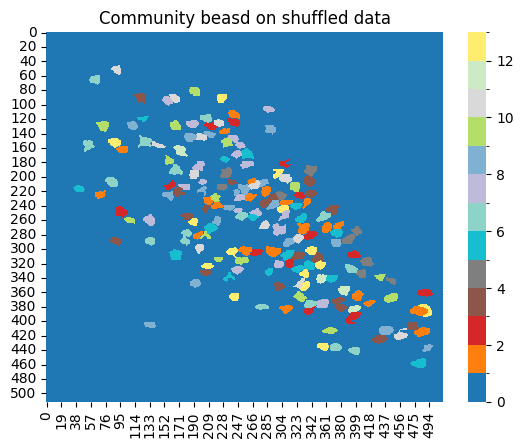

In [76]:
import matplotlib.colors as colors
pic = np.zeros((512,512))
for i in range(mask_index.shape[2]):
    index_row = np.where(mask_index[:,:,i]==True)[0]
    index_con = np.where(mask_index[:,:,i]==True)[1]
    for j in range(len(index_row)):
        if Community[i] ==0:
            pic[index_row[j],index_con[j]] = np.max(Community)+1
        else:
            pic[index_row[j],index_con[j]] = Community[i]
#cmap = sns.diverging_palette(220, 20, as_cmap=True)
import seaborn as sns

import seaborn as sns
tab10_colors = plt.cm.tab10(np.linspace(0, 1, 10))
extra_colors = plt.cm.Set3(np.linspace(0, 1, 14))  # 使用不同的colormap生成额外颜色
all_colors = np.vstack((tab10_colors, extra_colors[:14]))  # 只取额外颜色的前10种
custom_cmap = colors.ListedColormap(all_colors)
bounds = np.arange(0, 14) # 因为边界是从1开始，到12结束，所以需要加上13作为最后一个边界
#cmap = plt.cm.get_cmap('Spectral', len(bounds)-1) # 获取颜色映射，'viridis'可以替换成你喜欢的colormap
norm = BoundaryNorm(bounds, custom_cmap.N)
sns.heatmap(pic,  cmap=custom_cmap, norm=norm)

plt.title('Community beasd on shuffled data')
plt.show()


In [134]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
test = be_data['fam1_phi'][8,0][0:100,0]
# 角度数据

In [ ]:
#choose 

i = 5
Spike_train = neuron_spike[i]
A = dy_list[i]
A_shuffled = dy_list_shuffled[i]
mask_index = mask[:, :, int(mat_trigger[10 + i * 2, 0]):int(mat_trigger[11 + i * 2, 0])]
# In directed network, the links are removed if both sides have weights below their thresholds. 
# Otherwise there is no garanteee to have a connected network.

#KNN for sparse
import networkx as nx
from scipy import sparse

N = A.shape[0]
np.fill_diagonal(A, 0)
# print(max(A[:,4]))
# A=np.where(A > 0.09, 1, 0)
k = 10

# W.sort(reverse=True)
B1 = np.zeros((N, N))
for i in range(N):
    W = sorted(A[i, :], reverse=True)
    #     print( W[k])
    B1[i, :] = np.where(A[i, :] > W[k], 1, 0)

# B=np.multiply(B1,A)
# print(W[k])
# print(A[20,1:20])
# print(B[20,1:20])


C1 = np.zeros((N, N))
for i in range(N):
    W = sorted(A[:, i], reverse=True)
    #     print( W[k])
    C1[:, i] = np.where(A[:, i] > W[k], 1, 0)
# C=np.multiply(C1,A)
Q1 = B1 + C1
Q2 = np.where(Q1 > .9, 1, 0)

Q = np.multiply(Q2, A)
# del A
del B1
del C1
del Q1
del Q2
Connector(Q)
D = nx.to_networkx_graph(Q, create_using=nx.DiGraph())
D.number_of_edges()

# adjacency = nx.to_scipy_sparse_array(A)
import networkx as nx
import scipy.sparse as sp
import pygenstability as pgs
import scipy.sparse as sp

adjacency = sp.csr_matrix(Q)
test = sp.csgraph.connected_components(adjacency)
all_results = pgs.run(adjacency,
                      min_scale=-1.5,
                      max_scale=1.5,
                      n_scale=200,
                      n_tries=200,
                      constructor="directed")
all_results = pgs.identify_optimal_scales(all_results, kernel_size=12, window_size=12)
_ = pgs.plot_scan(all_results)
plt.show()